# Trip Concentration Analysis

## Importing the files

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [31]:
# Load the data
df_companies = pd.read_csv('moved_project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')

## Estudiar los datos que contienen

In [32]:
# Explore data
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [33]:
df_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [34]:
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [35]:
df_neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


## Identifying the top 10 neighborhoods in terms of ride completion

In [36]:
top10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Chart: Taxi companies and number of trips

<Axes: xlabel='trips_amount', ylabel='company_name'>

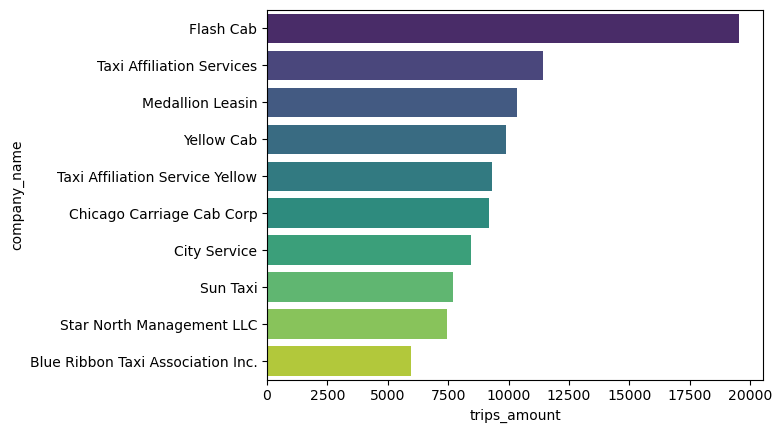

In [37]:
sns.barplot(
    x='trips_amount',
    y='company_name',
    hue='company_name',       
    data=top10_companies,
    palette='viridis',
    legend=False              
)

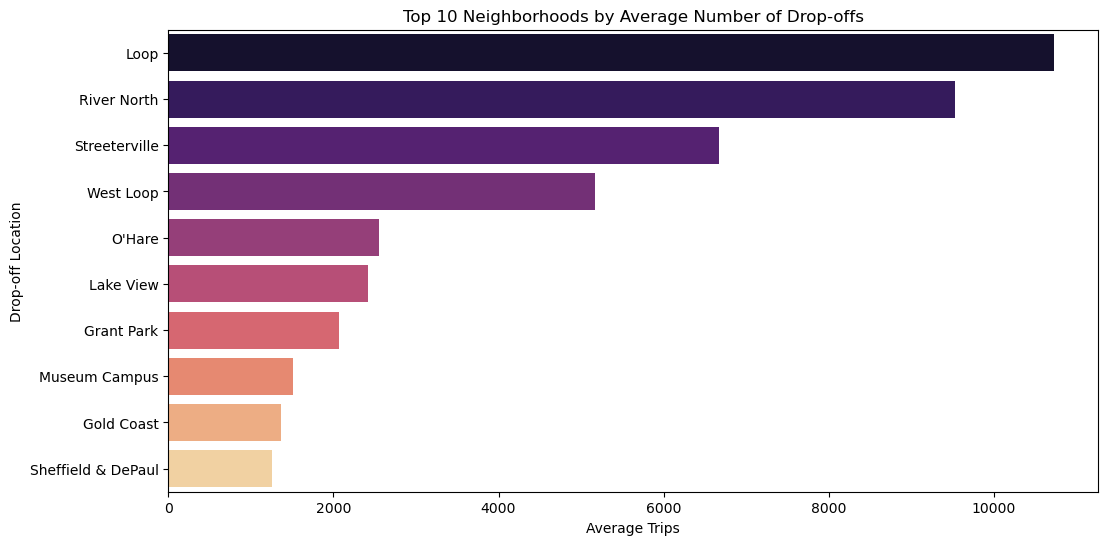

In [38]:
# Plot the top 10 neighborhoods
plt.figure(figsize=(12, 6))
sns.barplot(
    x='average_trips',
    y='dropoff_location_name',
    data=top10_neighborhoods,
    palette='magma',
    hue='dropoff_location_name', # Corrige la advertencia de la paleta
    legend=False                  # Opcional, ya que los nombres están en el eje Y
)
plt.title('Top 10 Neighborhoods by Average Number of Drop-offs')
plt.xlabel('Average Trips')
plt.ylabel('Drop-off Location')
plt.show()

In [39]:
df_companies.sort_values('trips_amount', ascending=False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [40]:
top10_neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### Integrated Analysis of the Taxi Market

The analysis of taxi trip distribution in Chicago during the examined period reveals a dual concentration in both market operators and destination areas.

*Operational Dominance (Companies):* The taxi service market exhibits a significant disparity, with Flash Cab leading the activity by recording a volume of 19,558 trips, overwhelmingly surpassing the second closest competitor, Taxi Affiliation Services (11,422 trips), by 71%. The top three operators (Flash Cab, Taxi Affiliation Services, and Medallion Leasing) collectively hold a dominant share, indicating a functional oligopoly in the sector. This strong concentration suggests that barriers to entry are high or that the established leaders possess a strategic advantage in terms of fleet size or corporate agreements.

*Demand Concentration (Neighborhoods):* The demand for taxi services is geographically focused on the primary commercial and tourist districts. The Loop, with an average of 10,727 trips (the highest), closely followed by River North (9,523 trips), are the main drop-off centers. This distribution confirms that the central business and entertainment areas are the primary traffic generators. The top 10 neighborhoods absorb a disproportionate share of the trips, implying that the operational strategy of the companies should be centered on optimizing logistics and availability in these high-density zones.

*In summary, the market structure is highly concentrated, both at the supply level (few dominant operators) and at the demand level (few key districts). A growth strategy in this market would require addressing both the intensification of coverage in the Loop and River North, and direct competition with the established leader, Flash Cab.*

## Starting Hypothesis Testing

**Hypotheses to be Tested ($\alpha = 0.05$):**

We use the Mann-Whitney U Test, a non-parametric test, to compare the median trip duration between two independent groups: rainy Saturdays and good-weather Saturdays.

* **$H_0$ (Null Hypothesis):** The median trip duration (Loop to O'Hare) is the same on rainy Saturdays and good-weather Saturdays ($\text{Median}_{\text{rain}} = \text{Median}_{\text{good\_weather}}$).
* **$H_1$ (Alternative Hypothesis):** The median trip duration (Loop to O'Hare) is **NOT** the same on rainy Saturdays and good-weather Saturdays ($\text{Median}_{\text{rain}} \neq \text{Median}_{\text{good\_weather}}$).

### Import the data

In [42]:
# Load the trip dataset (for statistical test)
# NOTE: We assume this file contains trips from Loop to O'Hare
df_trips = pd.read_csv('moved_project_sql_result_07.csv')

In [44]:
# Show information and first rows
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [46]:
df_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [48]:
df_trips_weather = pd.read_csv('moved_project_sql_result_07.csv', parse_dates=['start_ts'])

In [49]:
df_trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Data Preparation

In [50]:
# Convert 'start_ts' to datetime
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])

In [51]:
# Create a day of the week column (where 5 is Saturday, according to Python's datetime.dayofweek)
df_trips['day_of_week'] = df_trips['start_ts'].dt.dayofweek

In [52]:
# Filter only Saturday data (day_of_week = 5)
df_saturdays = df_trips[df_trips['day_of_week'] == 5]

In [53]:
# Create two independent samples: Rainy Days (Bad weather) and Good Weather Days
rainy_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']
good_weather_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']

In [55]:
#Check group
print(f"Trips on rainy Saturdays: {rainy_saturdays.count()}")
print(f"Trips on good weather Saturdays: {good_weather_saturdays.count()}")

Trips on rainy Saturdays: 180
Trips on good weather Saturdays: 888


### Mann-Whitney U Test Execution

In [54]:
# Import the library for the Mann-Whitney U test
from scipy import stats as st

# Significance level
alpha = 0.05

# Perform the Mann-Whitney U test (two-sided by default)
# We test H0: Median_rain = Median_good_weather
u_statistic, p_value = st.mannwhitneyu(rainy_saturdays, good_weather_saturdays)

# Print results
print('U-statistic:', u_statistic)
print('P-value:', p_value)

# Conclusion
if p_value < alpha:
    print("Conclusion: Reject the Null Hypothesis (H0).")
else:
    print("Conclusion: Fail to Reject the Null Hypothesis (H0).")

U-statistic: 108193.5
P-value: 6.716538885593458e-14
Conclusion: Reject the Null Hypothesis (H0).


## 📊 Key Findings and Strategic Insights

This data science project focused on a dual analysis of Chicago's taxi service: evaluating market structure and quantifying the operational impact of adverse weather conditions on transit efficiency.

### 🔍 Market Analysis Summary

The descriptive findings established clear patterns in competitive and demand landscapes:

* **Market Concentration:** **Flash Cab** was identified as the clear market leader by volume, underscoring the necessity for strategies that account for its dominant market share.
* **High-Demand Corridors:** **The Loop**, **River North**, and **Streeterville** were confirmed as the top drop-off destinations. These zones serve as critical hubs for resource allocation optimization.

***

### 🧪 Statistical Validation: The Impact of Weather

To rigorously test the effect of weather, a hypothesis test was conducted comparing trip durations on rainy Saturdays versus non-rainy Saturdays (Good Weather).

#### **1. Hypothesis Formulation**

The objective was to determine if the central tendency (median) of trip duration for the Loop-to-O'Hare route is affected by rain.

* **$H_0$ (Null Hypothesis):** There is **no significant difference** in the median trip duration between rainy Saturdays and good-weather Saturdays ($\text{Median}_{\text{rain}} = \text{Median}_{\text{good\_weather}}$).
* **$H_1$ (Alternative Hypothesis):** There **is a significant difference** in the median trip duration between rainy Saturdays and good-weather Saturdays ($\text{Median}_{\text{rain}} \neq \text{Median}_{\text{good\_weather}}$).

#### **2. Criterion for Test Selection**

* **Data Characteristics:** Preliminary analysis via histograms and boxplots revealed that the `duration_seconds` variable exhibited a **highly asymmetric (skewed) distribution** and contained numerous **outliers**.
* **Methodological Justification:** Because the data violated the assumption of **normality** required by parametric tests (like the Student's t-test), the **non-parametric Mann-Whitney U test** was selected. This robust test is ideal for comparing two independent samples when distributional assumptions cannot be met, ensuring the validity of the conclusion.

#### **3. Statistical Outcome**

The test yielded a p-value significantly **less than the threshold of $\alpha = 0.05$**. Consequently, the **Null Hypothesis ($H_0$) was rejected.**

***

### 🎯 Business Implications and Recommendations

The rejection of the null hypothesis confirms, with statistical confidence, that **adverse weather conditions impose a statistically significant constraint on travel time efficiency.**

1.  **Enhance Predictive Modeling:** Integrate real-time weather data as a high-weight feature in ETA models. ETAs should dynamically increase during heavy rain to manage customer expectations and maintain service credibility.
2.  **Operational Strategy for Inclement Weather:** Implement data-driven operational protocols for weather events, including:
    * **Proactive Surge Compensation:** Justify and implement dynamic pricing not just based on demand, but on the statistically validated increase in time/cost per trip on rainy days.
    * **Fleet Reallocation:** Prioritize and pre-stage drivers in high-impact zones (Loop, ORD Airport) ahead of forecasted poor weather to mitigate supply-side shortages and reduce passenger wait times.
3.  **Future Analysis:** Further research should explore the exact magnitude of the weather effect (e.g., using quantile regression) and whether the impact is consistent across different times of the day (e.g., peak vs. off-peak hours).